In [226]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [216]:
df = pd.read_csv('Coffee_Stores_Data.csv')

In [217]:
df.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [219]:
# df.groupby(['PLU']).count().sort_values(by=['StoreID'],ascending=False)

In [220]:
df.columns

Index(['StoreID', 'BusinessDate', 'PLU', 'Description', 'ItemType',
       'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder',
       'StockedOut', 'GroupID', 'MissedSales'],
      dtype='object')

In [224]:
df_18 = df[(((df['PLU']==810407) & (df['StoreID']==18) | (df['StoreID']==117) | (df['StoreID']==332)))].copy()
# df_18['DayOfMonth'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day).astype(str)
# df_18['DayOfWeek'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week).astype(str)
# df_18['Month'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month).astype(str)
# df_18['Year'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year).astype(str)
df_18['StoreID'] = df_18['StoreID'].astype(str)
df_18['PLU'] = df_18['PLU'].astype(str)
df_18.drop(['PLU','BusinessDate','Description', 'ItemType',
       'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity','EndQuantity', 'LatestOrder',
       'StockedOut', 'GroupID', 'MissedSales'],axis=1,inplace=True)

In [225]:
df_18.head()

,StoreID,PLU,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales
39461,18,3000227,Cold Case,Ready to Eat,4.0,1.0,4.0,9,0,0.00000
39462,18,830620,Bake Case,Muffins & Scones,2.0,1.0,0.0,7,1,2.56395
39463,18,6228,Cold Case,Ready to Drink,6.0,0.0,8.0,0,0,0.00000
39464,18,12216,Cold Case,Ready to Drink,0.0,0.0,3.0,0,0,0.00000
39465,18,3000277,Cold Case,Ready to Eat,4.0,3.0,4.0,16,0,0.00000


In [223]:
df_18.columns

Index(['StoreID', 'SoldQuantity'], dtype='object')

In [180]:
df_18 = pd.get_dummies(df_18,['StoreID'])

In [181]:
df_18.columns

Index(['SoldQuantity', 'StoreID_117', 'StoreID_18', 'StoreID_332'], dtype='object')

In [182]:
df_18 = df_18.astype(float)

In [183]:
# df_18[df_18['MissedSales'].isna()] = 0.0

In [184]:
train_dates = pd.to_datetime(df['BusinessDate'])
print(train_dates.tail(15))

1259761   2020-06-27
1259762   2020-06-27
1259763   2020-06-28
1259764   2020-06-28
1259765   2020-06-28
1259766   2020-06-28
1259767   2020-06-28
1259768   2020-06-28
1259769   2020-06-28
1259770   2020-06-29
1259771   2020-06-29
1259772   2020-06-29
1259773   2020-06-29
1259774   2020-06-29
1259775   2020-06-29
Name: BusinessDate, dtype: datetime64[ns]


In [185]:
df_18_X = df_18.drop(['SoldQuantity'],axis=1)
# df_18_y = df_18['SoldQuantity']

In [186]:
# fig, ax = plt.subplots(figsize=(18,8))

# df_temp = df_18_X[['ReceivedQuantity', 'EndQuantity', 'StockedOut',
#        'MissedSales', 'DayOfMonth', 'DayOfWeek', 'Month', 'Year',
#        'ItemType_Seasonal', 'ItemType_Unassigned',
#        'CategoryLvl3Desc_Bagels', 'CategoryLvl3Desc_Cakes & Breads',
#        'CategoryLvl3Desc_Cookies & Bars', 'CategoryLvl3Desc_Muffins & Scones',
#        'CategoryLvl3Desc_Pastries', 'CategoryLvl3Desc_Ready to Drink',
#        'CategoryLvl3Desc_Ready to Eat']]
# corrMatrix = df_temp.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [187]:
# df_18 = df_18.drop(['CategoryLvl2Desc_Cold Case','CategoryLvl2Desc_Bake Case'],axis=1)
# df_18 = df_18.drop(['GroupID','CategoryLvl2Desc_Bake Case','CategoryLvl2Desc_Cold Case','ItemType_Core',],axis=1)

In [188]:
df_18.columns

Index(['SoldQuantity', 'StoreID_117', 'StoreID_18', 'StoreID_332'], dtype='object')

In [189]:
df_18 = df_18[['SoldQuantity', 'StoreID_117', 'StoreID_18', 'StoreID_332']]

In [190]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

df_18_scaled = scaler.fit_transform(
    df_18[['SoldQuantity', 'StoreID_117', 'StoreID_18', 'StoreID_332']])

In [191]:
# import sklearn.preprocessing as preprocessing
# df_18_scaled = preprocessing.normalize(df_18_scaled, norm='l2')

In [192]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [193]:
for i in range(n_past, len(df_18) - n_future +1):
    trainX.append(df_18_scaled[i - n_past:i, 0:df_18.shape[1]])
    trainY.append(df_18_scaled[i + n_future - 1:i + n_future, 0])

In [194]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (21100, 14, 4).
trainY shape == (21100, 1).


In [198]:
from tensorflow.keras.losses import MeanSquaredError,CategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dense(8, 'relu'))
# model.add(Dense(1, 'linear'))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics='accuracy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 64)            17664     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [199]:
# NN_model = Sequential()

# # The Input Layer :
# NN_model.add(Dense(128, kernel_initializer='normal',input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu'))

# # The Hidden Layers :
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# # The Output Layer :
# NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# # Compile the network :
# NN_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
# NN_model.summary()

In [200]:
history = model.fit(trainX, trainY, epochs=10,batch_size=5000,validation_split=0.2, verbose=2)

Epoch 1/10
4/4 - 8s - loss: 0.8861 - accuracy: 0.0000e+00 - val_loss: 1.1683 - val_accuracy: 0.0000e+00 - 8s/epoch - 2s/step
Epoch 2/10
4/4 - 3s - loss: 0.7984 - accuracy: 0.0000e+00 - val_loss: 1.1816 - val_accuracy: 0.0000e+00 - 3s/epoch - 661ms/step
Epoch 3/10
4/4 - 3s - loss: 0.7447 - accuracy: 0.0000e+00 - val_loss: 1.2765 - val_accuracy: 0.0000e+00 - 3s/epoch - 666ms/step
Epoch 4/10
4/4 - 3s - loss: 0.7396 - accuracy: 0.0000e+00 - val_loss: 1.2997 - val_accuracy: 0.0000e+00 - 3s/epoch - 674ms/step
Epoch 5/10
4/4 - 3s - loss: 0.7368 - accuracy: 0.0000e+00 - val_loss: 1.2463 - val_accuracy: 0.0000e+00 - 3s/epoch - 718ms/step
Epoch 6/10
4/4 - 3s - loss: 0.7299 - accuracy: 0.0000e+00 - val_loss: 1.2304 - val_accuracy: 0.0000e+00 - 3s/epoch - 661ms/step
Epoch 7/10
4/4 - 3s - loss: 0.7248 - accuracy: 0.0000e+00 - val_loss: 1.2534 - val_accuracy: 0.0000e+00 - 3s/epoch - 669ms/step
Epoch 8/10
4/4 - 3s - loss: 0.7230 - accuracy: 0.0000e+00 - val_loss: 1.3024 - val_accuracy: 0.0000e+00 - 3

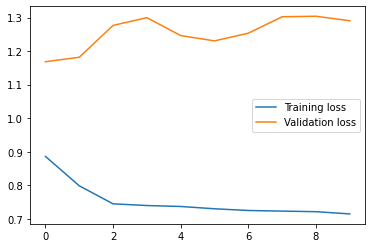

In [201]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [202]:
plt.plot(history.history['root_mean_squared_error'], label='Training loss')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation loss')
plt.legend()

KeyError: 'root_mean_squared_error'

In [120]:
# cols = df.columns

In [203]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [204]:
n_past = 16
n_days_for_prediction=15

In [205]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2020-06-29 00:00:00', freq='C'), Timestamp('2020-06-30 00:00:00', freq='C'), Timestamp('2020-07-01 00:00:00', freq='C'), Timestamp('2020-07-02 00:00:00', freq='C'), Timestamp('2020-07-06 00:00:00', freq='C'), Timestamp('2020-07-07 00:00:00', freq='C'), Timestamp('2020-07-08 00:00:00', freq='C'), Timestamp('2020-07-09 00:00:00', freq='C'), Timestamp('2020-07-10 00:00:00', freq='C'), Timestamp('2020-07-13 00:00:00', freq='C'), Timestamp('2020-07-14 00:00:00', freq='C'), Timestamp('2020-07-15 00:00:00', freq='C'), Timestamp('2020-07-16 00:00:00', freq='C'), Timestamp('2020-07-17 00:00:00', freq='C'), Timestamp('2020-07-20 00:00:00', freq='C')]


In [206]:
prediction = model.predict(trainX[-n_days_for_prediction:])

In [207]:
prediction

array([[0.5638935 ],
       [0.5672061 ],
       [0.5416452 ],
       [0.5274698 ],
       [0.523164  ],
       [0.5322679 ],
       [0.55432665],
       [0.5691362 ],
       [0.58460635],
       [0.60766184],
       [0.61532634],
       [0.6785438 ],
       [0.66730267],
       [0.67066354],
       [0.63599324]], dtype=float32)

In [227]:
prediction_copies = np.repeat(prediction, df_18.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

ValueError: operands could not be broadcast together with shapes (15,10) (4,) (15,10) 

In [209]:
y_pred_future

array([5.1799436, 5.1904345, 5.1094837, 5.06459  , 5.050954 , 5.079786 ,
       5.1496453, 5.196547 , 5.245541 , 5.3185577, 5.342831 , 5.54304  ,
       5.507439 , 5.518083 , 5.4082828], dtype=float32)

In [210]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [211]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'SoldQuantity':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [212]:
temp = df[(((df['PLU']==810407) & (df['StoreID']==18) | (df['StoreID']==117) | (df['StoreID']==332)))]
df_18['Date'] = temp['BusinessDate']

original = df_18[['Date', 'SoldQuantity']]
original['Date']=pd.to_datetime(original['Date'])

C:\Users\029338502\AppData\Local\Temp\ipykernel_7120\3612205673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [213]:
original = original.loc[original['Date'] >= '2019-10-01']

<AxesSubplot:>

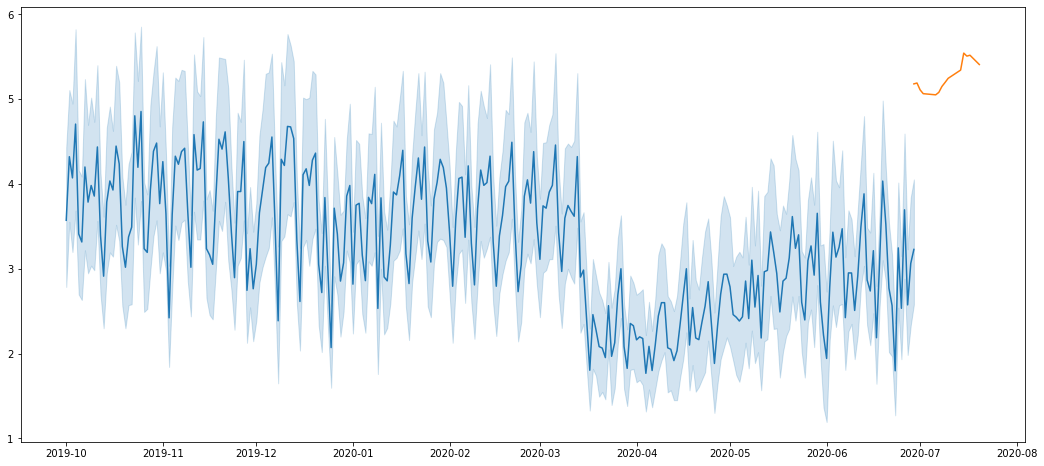

In [214]:
fig, ax = plt.subplots(figsize=(18,8))

sns.lineplot(x = original['Date'].values, y = original['SoldQuantity'].values)
sns.lineplot(x = df_forecast['Date'].values, y = df_forecast['SoldQuantity'].values)

In [ ]:
df_18 = df[df['StoreID'] == 18].copy()
# df_18['DayOfMonth'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
# df_18['DayOfWeek'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
# df_18['Month'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
# df_18['Year'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)
df_18.drop(['StoreID','Description','LatestOrder','CategoryLvl1Desc'],axis=1,inplace=True)

In [7]:
df_for_training = df[cols].astype(float)

ValueError: could not convert string to float: '2019-06-29'

In [808]:
df_18.head()

,SoldQuantity,StoreID_117,StoreID_18,StoreID_332
39469,7.0,0.0,1.0,0.0
39496,9.0,0.0,1.0,0.0
39522,6.0,0.0,1.0,0.0
39548,7.0,0.0,1.0,0.0
39575,8.0,0.0,1.0,0.0


In [929]:
data_temp = df_18.copy()

In [930]:
df_18['Date'] = temp['BusinessDate']

In [931]:
data_temp

,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales,StoreID_117,StoreID_18,StoreID_332,PLU_12216,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Year_2019,Year_2020
39461,4.0,1.0,4.0,9.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39462,2.0,1.0,0.0,7.0,1.0,2.563950,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39463,6.0,0.0,8.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39464,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39465,4.0,3.0,4.0,16.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998044,0.0,15.0,5.0,14.0,0.0,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
998045,0.0,2.0,1.0,13.0,0.0,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
998046,0.0,10.0,5.0,18.0,0.0,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
998047,0.0,4.0,0.0,13.0,1.0,3.282873,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
